# Import Libraries

In [30]:
# Default
import numpy as np
import pandas as pd

def desc(df):
    dataDesc = []

    for i in df.columns:
        dataDesc.append([
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round((((df[i].isna().sum()) / len(df)) * 100), 2),
            df[i].nunique(),
            df[i].drop_duplicates().sample(2).values
        ])

    description = pd.DataFrame(dataDesc, columns=[
        'Data Feature',
        'Data Types',
        'Null',
        'Null Percentage',
        'Unique',
        'Unique Sample'
    ])

    return description

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data

In [94]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [95]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

#### 1) Untuk feature/column Landsize & Price, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)

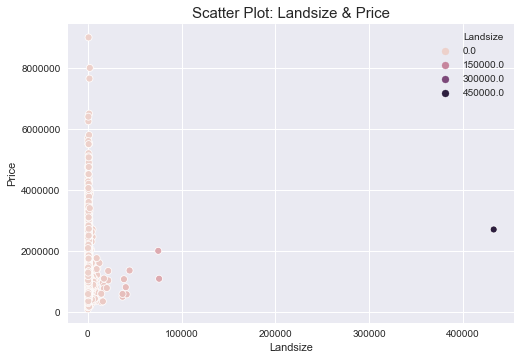

In [17]:
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Landsize')

plt.title('Scatter Plot: Landsize & Price', size=15)

plt.show()

- Titik Pusat Data
    - Central tendency data Price ada di angka 1075684.0
    - Central tendency data Landsize ada di angka 558.0
- Sebaran datanya terpusat di landsize di bawah 50,000 dan harga di bawah 2,000,000
- Distribusinya hampir menyerupai distribusi normal

In [156]:
df.describe().round()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,YearBuiltInt
count,13580.0,13580.0,13580.0,13580.0,13580.0,13580.0,13518.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0,13580.0
mean,3.0,1075684.0,10.0,3105.0,3.0,2.0,2.0,558.0,152.0,1965.0,-38.0,145.0,7454.0,1187.0
std,1.0,639311.0,6.0,91.0,1.0,1.0,1.0,3991.0,541.0,37.0,0.0,0.0,4379.0,961.0
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,144.0,249.0,0.0
25%,2.0,650000.0,6.0,3044.0,2.0,1.0,1.0,177.0,93.0,1940.0,-38.0,145.0,4380.0,0.0
50%,3.0,903000.0,9.0,3084.0,3.0,1.0,2.0,440.0,126.0,1970.0,-38.0,145.0,6555.0,1925.0
75%,3.0,1330000.0,13.0,3148.0,3.0,2.0,2.0,651.0,174.0,1999.0,-38.0,145.0,10331.0,1975.0
max,10.0,9000000.0,48.0,3977.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.0,146.0,21650.0,2018.0


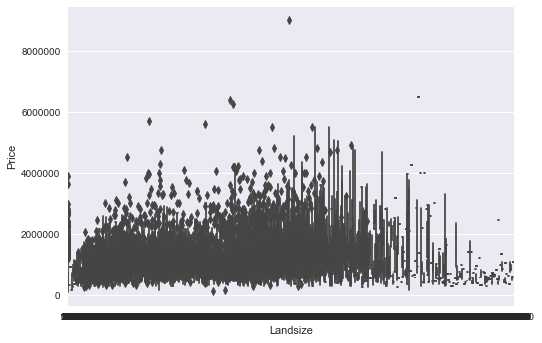

In [157]:
plt.style.use('seaborn')
sns.boxplot(data=df, x='Landsize', y='Price')

plt.show()

#### 2) Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [19]:
# Find the Upper Fence & Lower Fence
Q1 = df.describe()['Distance']['25%']
Q3 = df.describe()['Distance']['75%']
IQR = Q3 - Q1

Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

# Data Outliers
df_outliers = df[(df['Distance'] < Lower_Fence) | (df['Distance'] > Upper_Fence)]

In [23]:
df_outliers['Distance'].sample(5)

12275    24.7
12496    24.8
12627    25.5
9227     29.8
12210    25.5
Name: Distance, dtype: float64

In [25]:
print(f"Upper Fence: {Upper_Fence}, Lower_Fence: {Lower_Fence}, max_outliers: {df_outliers['Distance'].max()}, min_outliers: {df_outliers['Distance'].min()}")

Upper Fence: 23.35, Lower_Fence: -4.250000000000002, max_outliers: 48.1, min_outliers: 23.5


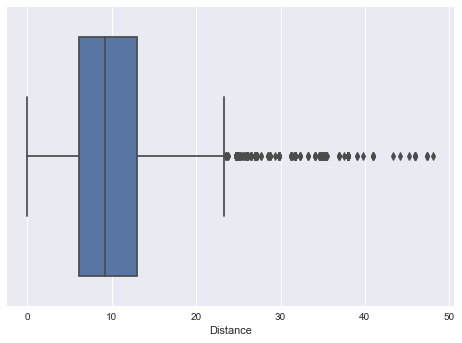

In [10]:
plt.style.use('seaborn')
ax = sns.boxplot(x=df['Distance'])
plt.show()

- Data outliers dimulai sebarannya dari Distance: 23.35 hingga 48.1 
- Tidak ada data outliers yang berada di bawah batas bawah, karena memang tidak ada jarak yang lebih kecil dari 0

#### 3) Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

In [109]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [127]:
# Create Feature YearBuiltInt (year in integer)
df['YearBuiltInt'] = df['YearBuilt'].fillna(0.0).astype(int)
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltInt
2273,Elwood,7/8 John St,1,u,357000.0,S,Chisholm,7/05/2016,7.7,3184.0,...,1.0,0.0,50.0,1965.0,Port Phillip,-37.87850,144.98850,Southern Metropolitan,8989.0,1965
1224,Brighton East,4 Hansen St,3,h,900000.0,S,Hodges,19/11/2016,10.7,3187.0,...,2.0,236.0,NaN,NaN,Bayside,-37.92150,145.02270,Southern Metropolitan,6938.0,0
7110,Kingsville,74 Chirnside St,3,h,1340000.0,S,Jas,19/11/2016,7.8,3012.0,...,0.0,272.0,132.0,1915.0,Maribyrnong,-37.80790,144.88250,Western Metropolitan,1808.0,1915
910,Bentleigh East,2/10 Matthews Rd,2,u,485000.0,SP,Buxton,22/05/2016,13.9,3165.0,...,2.0,0.0,83.0,2011.0,Glen Eira,-37.92920,145.07080,Southern Metropolitan,10969.0,2011
4937,Preston,14 Arthur St,2,h,1065000.0,S,Love,15/10/2016,8.8,3072.0,...,3.0,507.0,114.0,1910.0,Darebin,-37.74370,144.99950,Northern Metropolitan,14577.0,1910
4909,Preston,28 Tynan St,3,h,1000000.0,S,Nelson,8/10/2016,8.8,3072.0,...,2.0,463.0,NaN,NaN,Darebin,-37.73390,144.98970,Northern Metropolitan,14577.0,0
11359,Fitzroy North,4/199 Barkly St,1,u,381000.0,SP,Nelson,15/07/2017,3.6,3068.0,...,1.0,454.0,NaN,NaN,Yarra,-37.77869,144.98578,Northern Metropolitan,6244.0,0
1672,Carlton North,112 Newry St,4,h,1425000.0,S,Nelson,4/03/2017,3.2,3054.0,...,0.0,122.0,130.0,1890.0,Yarra,-37.78930,144.96960,Northern Metropolitan,3106.0,1890
11901,Boronia,42 Matlock Rd,3,h,790000.0,S,Ray,29/07/2017,25.0,3155.0,...,2.0,868.0,NaN,NaN,Knox,-37.85981,145.25475,Eastern Metropolitan,9704.0,0
9151,Fawkner,42 Denys St,3,h,712000.0,S,Ray,3/06/2017,13.1,3060.0,...,2.0,603.0,94.3,1960.0,Moreland,-37.70037,144.97007,Northern Metropolitan,5070.0,1960


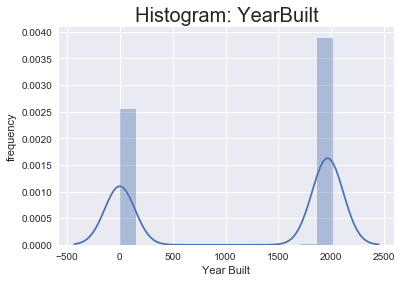

In [123]:
sns.distplot(df['YearBuiltInt'])
plt.title('Histogram: YearBuilt', size=20)

plt.xlabel('Year Built')
plt.ylabel('frequency')

plt.show()

In [140]:
len(df[df.YearBuiltInt==0]['YearBuilt']), len(df), round(len(df[df.YearBuiltInt==0]['YearBuilt'])/len(df)*100, 2)

(5375, 13580, 39.58)

- 39.58% (5375) data tahun tidak tersedia
- dari data yang ada dapat diketahui bahwa tahun paling di mana properti paling banyak dibangun adalah di tahun 2000an dan menjelang tahun Masehi (menuju tahun 0)

In [128]:
# plt.hist(df['YearBuiltInt'])
# plt.title('Year Built', size=17)
# plt.xlabel('Year Built')
# plt.ylabel('Frequency')

# plt.show();

#### 4) Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

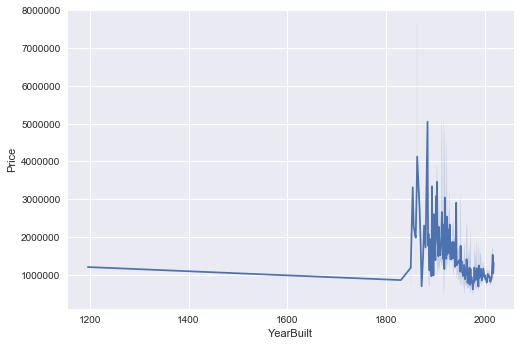

In [143]:
plt.style.use('seaborn')
ax = sns.lineplot(data=df, x='YearBuilt', y='Price', estimator='mean')

- trend rata harga cenderung menurun dari tahun 1200 hingga sekitar beberapa dekade awal 1800. Trend ini disebabkan oleh banyak data kosong untuk tahun-tahun di periode tersebut.
- di periode beberapa dekade setelah awal 1800, terlihat data harga rata-rata rumah berfluktuasi sangat ekstrem. Hal ini kemungkin dipicu oleh beberapa peristiwa penting seperti wabah flu spanyol (1918) dan dua Perang Dunia (1918 & 1942). Peristiwa yang bersifat katastrofi tersebut menyebabkan AS mengalami depresi dan kemungkinan memicu memicu trend menurun dari harga rata-rata properti.
- di tahun 2008 juga terjadi krisis ekonomi yang salah satunya disebabkan oleh subprime mortgage bisa menjadi penyebab fluktuasi harga dengan trend menurun, namun setelah pulih, pasar properti pun kembali naik.

#### 5) Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

#### 6) Temukan RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah:

- Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
- Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
- Metode penjualan properti (Method) yang paling sering dilakukan!

In [67]:
df_Regionname = df[['Price', 'Regionname']].groupby(['Regionname'], as_index=False).mean()
df_Regionname

,Regionname,Price
0,Eastern Metropolitan,1.104080e+06
1,Eastern Victoria,6.999808e+05
2,Northern Metropolitan,8.981711e+05
3,Northern Victoria,5.948293e+05
4,South-Eastern Metropolitan,9.229438e+05
5,Southern Metropolitan,1.372963e+06
6,Western Metropolitan,8.664205e+05
7,Western Victoria,3.975234e+05


Region yang memiliki harga rata-rata tertinggi adalah Southern Metropolitan


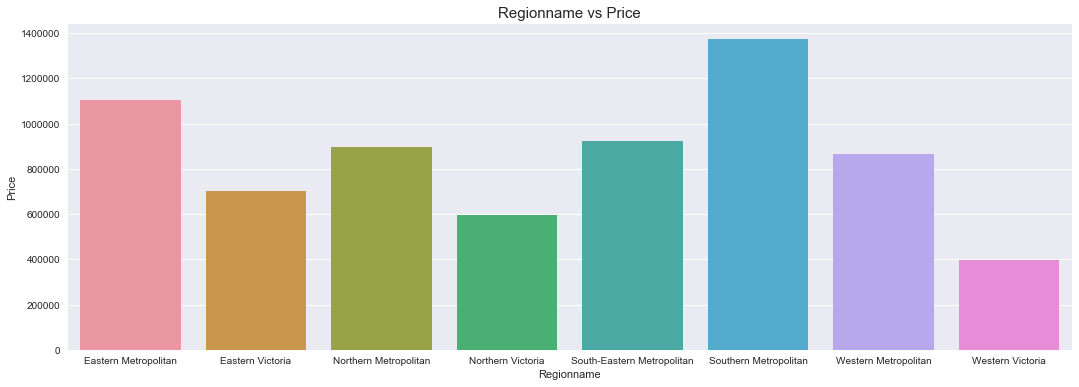

In [68]:
print("Region yang memiliki harga rata-rata tertinggi adalah Southern Metropolitan")

fig = plt.figure(figsize=(18, 6))
sns.barplot(data=df_Regionname, x='Regionname', y='Price')
plt.title('Regionname vs Price', size=15)
plt.show()

In [86]:
data = df[df['Regionname']=='Southern Metropolitan']
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
78,Albert Park,105 Kerferd Rd,2,h,1275000.0,S,hockingstuart,3/09/2016,3.3,3206.0,...,1.0,0.0,120.0,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280.0
79,Albert Park,85 Richardson St,2,h,1455000.0,S,Thomson,3/09/2016,3.3,3206.0,...,1.0,0.0,159.0,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280.0
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,...,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.8481,144.9499,Southern Metropolitan,3280.0
81,Albert Park,94 Graham St,3,h,1850000.0,S,Greg,4/03/2017,3.3,3206.0,...,2.0,0.0,128.0,133.0,1890.0,Port Phillip,-37.8452,144.9488,Southern Metropolitan,3280.0
82,Albert Park,396 Montague St,2,h,1436000.0,S,RT,4/03/2017,3.3,3206.0,...,1.0,0.0,130.0,81.0,1900.0,Port Phillip,-37.8431,144.9565,Southern Metropolitan,3280.0


In [141]:
# Lima CouncilArea yang memiliki rata-rata harga rumah tertinggi!
data = df[df['Regionname']=='Southern Metropolitan']
df_CouncilArea = pd.crosstab(index=data['CouncilArea'], columns='Avg_Price', values=data['Price'], aggfunc='mean').round().sort_values(by='Avg_Price', ascending=False)
df_CouncilArea.head(6)

# 5 council area yang punya rata-rata harga rumah tertinggi
# Bayside
# Boroondara
# Whitehorse
# Stonnington
# Port Phillip
# --> Unavailable jika definisinya data tidak tersedia maka ini tidak masuk ke kategori

col_0,Avg_Price
CouncilArea,
Bayside,1652168.0
Boroondara,1646740.0
Unavailable,1325000.0
Whitehorse,1297237.0
Stonnington,1293382.0
Port Phillip,1144346.0


In [98]:
# Tipe properti (Type) yang memiliki rata-rata harga rumah tertinggi!
data = df[df['Regionname']=='Southern Metropolitan']
df_Type = pd.crosstab(index=data['Type'], columns='Avg_Price', values=data['Price'], aggfunc='mean').round().sort_values(by='Avg_Price', ascending=False)
df_Type.head()

# Type yang punya rata-rata harga rumah tertinggi adalah Type h


col_0,Avg_Price
Type,
h,1802241.0
t,1205404.0
u,664860.0


In [90]:
# Metode penjualan properti (Method) yang paling sering dilakukan!
data = df[df['Regionname']=='Southern Metropolitan']
df_Method = pd.crosstab(index=data['Method'], columns='Count').sort_values(by=['Count'], ascending=False)
df_Method.head()

# Metode penjualan properti (Method) yang paling sering dilakukan adalah S

col_0,Count
Method,
S,3038
PI,671
VB,572
SP,376
SA,38


#### 7) Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name!

In [161]:
df_Price = df[['Price', 'Regionname']].groupby(['Regionname'], as_index=False).mean().round()
df_Price

,Regionname,Price
0,Eastern Metropolitan,1104080.0
1,Eastern Victoria,699981.0
2,Northern Metropolitan,898171.0
3,Northern Victoria,594829.0
4,South-Eastern Metropolitan,922944.0
5,Southern Metropolitan,1372963.0
6,Western Metropolitan,866421.0
7,Western Victoria,397523.0
